In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Normal Equation

Generate some linear-looking data to test **The Normal Equation**
<br>**The Normal Equation** is used to find a value of vector Theta that minimizes the MSE

In [2]:
np.random.seed(42)
m = 100 # Number of instances
X = 2 * np.random.rand(m, 1) # column Vector
y = 4 + 3 * X + np.random.randn(m, 1) # Column Vector

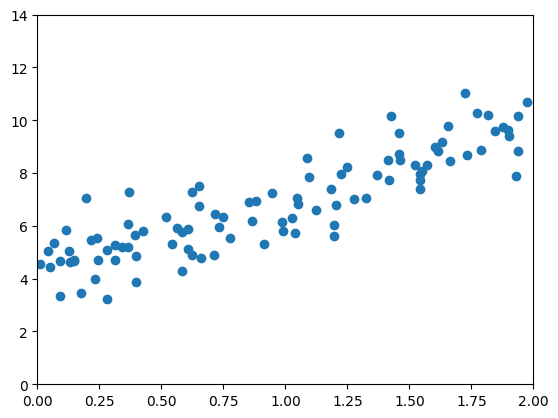

In [3]:
fig, ax = plt.subplots()

ax.scatter(x=X, y=y)
ax.set(xlim=(0, 2), ylim=(0,14))

plt.show()

Compute $ \hat\theta $ or the value of $ \theta $ that minimizes the cost function

In [4]:
from sklearn.preprocessing import add_dummy_feature

In [5]:
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y 
# The @ operator is the matrix product of two arrays or np.matmul

The generate data is y = 4 + 3*x1 + Gaussian Noise <br>
That means that theta_best should return $ \theta 0 $ = 4 and $ \theta 1 $ = 3

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
# Make predictions based on theta_best
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

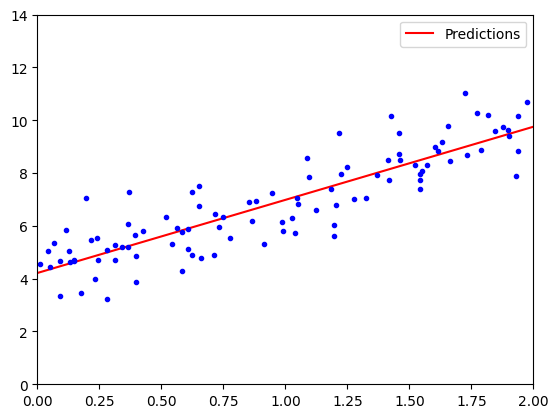

In [8]:
fig, ax = plt.subplots()

ax.plot(X_new, y_predict, "r-", label='Predictions')
ax.plot(X,y, "b.")

ax.set(xlim=(0,2), ylim=(0,14))
ax.legend()
plt.show()

## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [10]:
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
# Same coef from the Normal Equation

[4.21509616] [[2.77011339]]


In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient Descent

In [17]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[4.21509616],
       [2.77011339]])